In [116]:
# Importation des bibliotheques Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [117]:
# Importation des données
df_train = pd.read_csv("./Data/train.csv")
df_test = pd.read_csv("./Data/test.csv")

In [118]:
# Visualisation des données
df_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [119]:
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [120]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

<AxesSubplot:ylabel='None'>

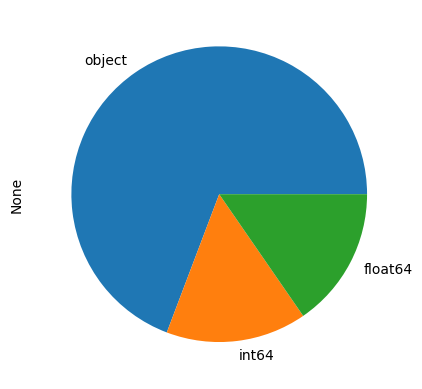

In [121]:
df_train.dtypes.value_counts().plot.pie()

In [122]:
# Affichage du nombre de NaN par colonnes
pd.isnull(df_train).sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

On peut voir sur le tableau ci-dessus que la/les colonne(s): New_Price contient 5195 valeurs null, Engine et Power contiennent 36 valeurs null,  Seats 42 valeurs null, et Mileage 2 valeurs null.
Etant données la quantité de données null dans New_Price, il me semble judicieux de supprimer la colonne du dataset df_train avant de modifier ou supprimer les valeurs null des autre colonnes.

In [123]:
# Modification du dataset
df_train = df_train.drop(columns=['New_Price'])
df_train = df_train.dropna()
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [124]:
# Vérification de l'abscence de NaN après modification du dataset
pd.isnull(df_train).sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<AxesSubplot:>

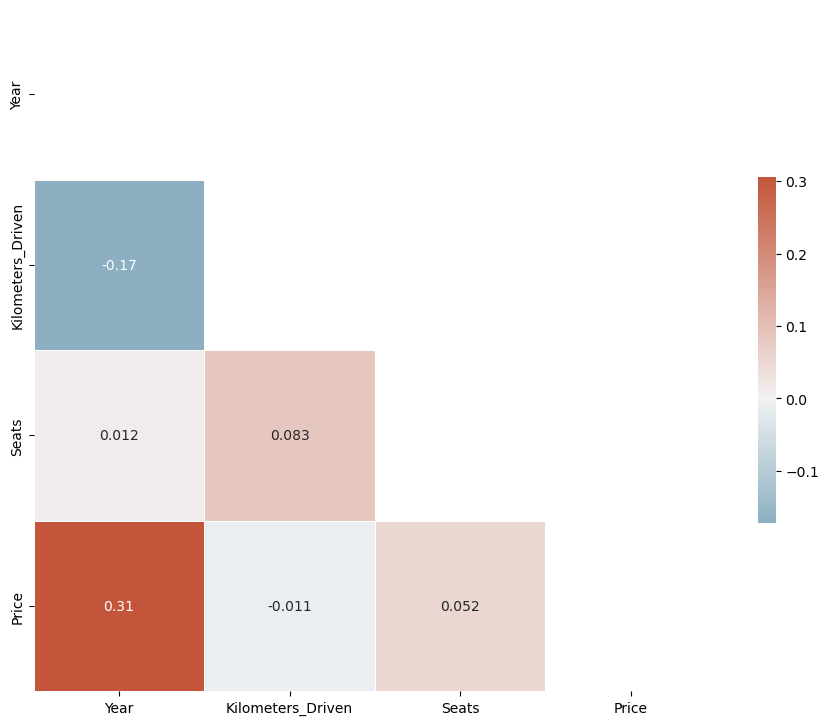

In [125]:
# Affichage de la 1ère matrice de collération
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

La matrice de corrélation ci-dessus n'utilise que les colonnes de notre dataset qui contiennent des valeurs numériques (4/12 après le retrait de la colonne New_Price). Cela signifie que ses résultats ne sont pas représentatif de notre dataset et que nous allons devoir transformer certaines ou toutes les colonnes de type objet pour améliorer notre matrice.

In [126]:
# Analyse des colonnes de type object
df_train.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64

In [127]:
df_train.Location.value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [128]:
df_train.Fuel_Type.value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [129]:
df_train.Transmission.value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

In [130]:
df_train.Owner_Type.value_counts()

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [131]:
df_train.Engine.value_counts()

1197 CC    606
1248 CC    512
1498 CC    303
998 CC     259
2179 CC    240
          ... 
1489 CC      1
1422 CC      1
1978 CC      1
2694 CC      1
1797 CC      1
Name: Engine, Length: 145, dtype: int64

In [132]:
df_train.Power.value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
201 bhp         1
199.3 bhp       1
95 bhp          1
152.88 bhp      1
181.04 bhp      1
Name: Power, Length: 371, dtype: int64

In [133]:
# Modification des colonnes de type object en colonnes de type float ou int
location_code = {
    'Mumbai': 1,
    'Hyderabad': 2,
    'Kochi': 3,
    'Coimbatore': 4,
    'Pune': 5,
    'Dehli': 6,
    'Kolkata': 7,
    'Chennai': 8,
    'Jaipur': 9,
    'Bangalore': 10,
    'Ahmedabad': 11,
}

fuel_code = {
    'Diesel': 1,
    'Petrol': 2,
    'CNG': 3,
    'PLG': 4,
}

transmission_code = {
    'Manual': 1,
    'Automatic': 2,
}

owner_code = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4,
}

df_train['Location'] = df_train['Location'].map(location_code)
df_train['Fuel_Type'] = df_train['Fuel_Type'].map(fuel_code)
df_train['Transmission'] = df_train['Transmission'].map(transmission_code)
df_train['Owner_Type'] = df_train['Owner_Type'].map(owner_code)
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1.0,2010,72000,3.0,1,1,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5.0,2015,41000,1.0,1,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,8.0,2011,46000,2.0,1,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,8.0,2012,87000,1.0,1,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4.0,2013,40670,1.0,2,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,NaN,2014,27365,1.0,1,1,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,9.0,2015,100000,1.0,1,1,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,9.0,2012,55000,1.0,1,2,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,7.0,2013,46000,2.0,1,1,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


<AxesSubplot:>

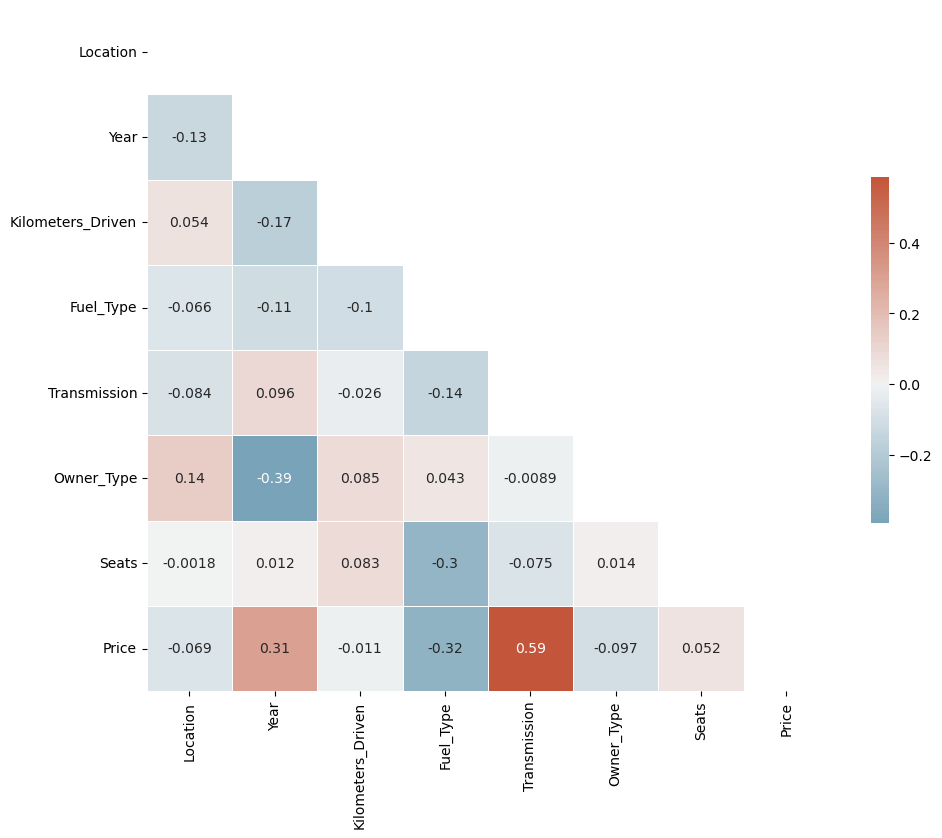

In [134]:
# Affichage d'une 2ème matrice de collération
corr = df_train.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

Cette matrice de corrélation est meilleur que la première matrice généré

In [135]:
df_train['Engine'] = df_train['Engine'].str.replace(' CC', '')
df_train['Power'] = df_train['Power'].str.replace(' bhp', '')

In [136]:
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1.0,2010,72000,3.0,1,1,26.6 km/kg,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,5.0,2015,41000,1.0,1,1,19.67 kmpl,1582,126.2,5.0,12.50
2,Honda Jazz V,8.0,2011,46000,2.0,1,1,18.2 kmpl,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,8.0,2012,87000,1.0,1,1,20.77 kmpl,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,4.0,2013,40670,1.0,2,2,15.2 kmpl,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,NaN,2014,27365,1.0,1,1,28.4 kmpl,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,9.0,2015,100000,1.0,1,1,24.4 kmpl,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,9.0,2012,55000,1.0,1,2,14.0 kmpl,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,7.0,2013,46000,2.0,1,1,18.9 kmpl,998,67.1,5.0,2.65
